# CZ1115 Mini-Project
                                                                                              Group Member:
                                                                                              ZOU ZE REN  U2022422H
                                                                                            CHUA ZI JIAN  U2022354J
                                                                                             LEE MING DA  U2022453D
---
## Chosen Dataset 5 : 
Olist E-Commerce and Marketing Datasets
##### Source:
https://www.kaggle.com/olistbr/brazilian-ecommerce

---
## Problem Statement: 
### Predict rating for better improvement to e-commerce company


Most customers do not post a review rating or any comment after purchasing a product which is a challenge for any ecommerce platform to perform If a company predicts whether a customer liked/disliked a product so that they can recommend more similar and related products as well as they can decide whether or not a product should be sold at their end. This is crucial for ecommerce based company because they need to keep track of each product of each seller , so that none of products discourage their customers to come shop with them again. Moreover, if a specific product has very few rating and that too negetive, a company must not drop the product straight away, may be many customers who found the product to be useful haven't actually rated it.

Some reasons could possibly be comparing your product review with those of your competitors beforehand,gaining lots of insight about the product and saving a lot of manual data pre-processin,maintain good customer relationship with company,lend gifts, offers and deals if the company feels the customer is going to break the relation.

Objective of this case study is centered around predicting customer satisfaction with a product which can be deduced after predicting the product rating a user would rate after he makes a purchase.

---
### Import Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pltimport 

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import datetime as dt

---

### Import Dataset

In [2]:
cust_data = pd.read_csv('olist_customers_dataset.csv')
geo_data =  pd.read_csv('olist_geolocation_dataset.csv')
order_items =  pd.read_csv('olist_order_items_dataset.csv')
order_payments =  pd.read_csv('olist_order_payments_dataset.csv')
order_reviews =  pd.read_csv('olist_order_reviews_dataset.csv')
order_data =  pd.read_csv('olist_orders_dataset.csv')
products_data = pd.read_csv('olist_products_dataset.csv')
sellers_data = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')

---
## Data Merging and Cleaning

In [3]:
geo_data.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)
cust_data.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
sellers_data.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)

In [4]:
#keeping only the unique zip code prefix so that it can act as key to join tables
geo_data.drop_duplicates(subset='zip_code_prefix',inplace=True)
geo_data.shape

(19015, 5)

#### Customer Related Data

In [5]:
#merging all customer related data

A = pd.merge(order_data,order_reviews,on='order_id')
A = pd.merge(A,order_payments,on='order_id')
A = pd.merge(A,cust_data,on='customer_id')

#peforming left outer join as we need every geo based address related to customer

A = pd.merge(A,geo_data,how='left',on='zip_code_prefix')
A.shape

(104485, 26)

In [6]:
A.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,payment_installments,payment_value,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,vianopolis,GO


In [7]:
A.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zip_code_prefix', 'customer_city', 'customer_state', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state'],
      dtype='object')

#### Seller Related Data

In [8]:
#merging all seller related data

B = pd.merge(order_items,products_data,on='product_id')
B = pd.merge(B,sellers_data,on='seller_id')
B = pd.merge(B,product_category,on='product_category_name')

#peforming left outer join as we need every geo based address related to seller

B = pd.merge(B,geo_data,how='left',on='zip_code_prefix')
B.shape

(111023, 23)

In [9]:
B.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_height_cm,product_width_cm,zip_code_prefix,seller_city,seller_state,product_category_name_english,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,-22.498183,-44.123614,volta redonda,RJ
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,-22.498183,-44.123614,volta redonda,RJ
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,-22.498183,-44.123614,volta redonda,RJ
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,-22.498183,-44.123614,volta redonda,RJ
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,-22.498183,-44.123614,volta redonda,RJ


In [10]:
B.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

#### Both A and B are related based on order_id

In [11]:
#merging customer based data to the seller based data

data = pd.merge(A,B,on='order_id')
data.shape

(116581, 48)

In [12]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_height_cm,product_width_cm,zip_code_prefix_y,seller_city,seller_state,product_category_name_english,geolocation_lat_y,geolocation_lng_y,geolocation_city_y,geolocation_state_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.0,13.0,9350,maua,SP,housewares,-23.680114,-46.452454,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.0,13.0,9350,maua,SP,housewares,-23.680114,-46.452454,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.0,13.0,9350,maua,SP,housewares,-23.680114,-46.452454,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,13.0,19.0,31570,belo horizonte,SP,perfumery,-19.810119,-43.984727,belo horizonte,MG
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,19.0,21.0,14840,guariba,SP,auto,-21.362358,-48.232976,guariba,SP


In [13]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zip_code_prefix_x', 'customer_city', 'customer_state',
       'geolocation_lat_x', 'geolocation_lng_x', 'geolocation_city_x',
       'geolocation_state_x', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_y', 'seller_city', 'seller_state',
    

#### Removing outliers from the dataset

In [14]:
data=data
for item in data.describe().columns:
    data = data[data[item] < (data.describe()[item].iloc[1] + (data.describe()[item].iloc[2]*3))]
    data = data[data[item] > (data.describe()[item].iloc[1] - (data.describe()[item].iloc[2]*3))]

#### Bring out possible data we need to use

In [15]:
orders=pd.DataFrame()
orders=data[['order_id','order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date','order_delivered_carrier_date','shipping_limit_date','product_category_name_english', 'review_score','freight_value','product_description_lenght','product_photos_qty','price','payment_installments']]

#### Checking Data types of the time in dataset

In [16]:
orders['order_purchase_timestamp'].dtype

dtype('O')

So we can see that the time data in the dataset is read as 'O',which is string but we intend to calculate some data using the given time so we changed it to date(data types)

In [17]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp).dt.date 
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at).dt.date  
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date).dt.date  
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date).dt.date 
orders['shipping_limit_date'] = pd.to_datetime(orders['shipping_limit_date']).dt.date
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date']).dt.date

<ipython-input-17-3822b6fc8b54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp).dt.date
<ipython-input-17-3822b6fc8b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at).dt.date
<ipython-input-17-3822b6fc8b54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [18]:
orders['order_delivered_customer_date'].isnull().sum()


1734

In [19]:
orders['order_delivered_carrier_date'].isnull().sum()

795

In [20]:
orders['order_delivered_customer_date'].isnull().sum()

1734

We found out that there are null in our dataset so we need to clean it

In [21]:
orders = orders[orders['order_approved_at'].notna()]
orders = orders[orders['order_delivered_carrier_date'].notna()]
orders = orders[orders['order_delivered_customer_date'].notna()]

### Calculate the required data we might use in our model

In [22]:
############ Features Hypotesis

####Estimated Delivery Time
#Gets the days between order approval and estimated delivery date. A customer might be unsatisfied if he is told that the estimated time is big.

####Actual Delivery Time
#Gets the days between order approval and delivered customer date. A customer might be more satisfied if he gets the product faster.

####Delivery Time Difference
#The difference between the actual and estimated date. If negative was delivered early, if positive was delivered late. A customer might be more satisfied if the order arrives sooner than expected, or unhappy if he receives after the deadline

####Is On time?
#Binary variable indicating if the order was delivered after the estimated date.

####Total Order Value
#If a customer expends more, he might expect a better order fulfilment.

####Order Freight Ratio
#If a customer pays more for freight, he might expect a better service.



In [23]:

#subtracting the order_purchase_time to rest time based feature and converting date time into string to remove the timestamp notation 
orders['delivery_days'] = orders['order_delivered_customer_date'].sub(orders['order_purchase_timestamp'],axis=0).astype(str)
orders['estimated_days'] = orders['order_estimated_delivery_date'].sub(orders['order_purchase_timestamp'],axis=0).astype(str)
orders['ships_in_time'] = orders['shipping_limit_date'].sub(orders['order_purchase_timestamp'],axis=0).astype(str)

orders['delivery_days'] = orders['delivery_days'].str.replace(" days","").astype(int)
orders['estimated_days'] = orders['estimated_days'].str.replace(" days","").astype(int)
orders['ships_in_time'] = orders['ships_in_time'].str.replace(" days","").astype(int)
orders['arrival_time'] = (orders['estimated_days'] - orders['delivery_days']).apply(lambda x: 'Early/OnTime' if x  > 0 else 'Late')
orders['diff_in_Estimate_n_Actual'] = (orders['estimated_days'] - orders['delivery_days']).astype(int)
orders['rating'] = (orders['review_score']).apply(lambda x: 'Good' if x  > 3 else 'Bad')
orders['total_order_value'] = orders['price'] + orders['freight_value']
orders['order_freight_ratio'] =orders['freight_value'] / orders['price']


In [24]:
orders.head()

,order_id,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,shipping_limit_date,product_category_name_english,review_score,freight_value,...,price,payment_installments,delivery_days,estimated_days,ships_in_time,arrival_time,diff_in_Estimate_n_Actual,rating,total_order_value,order_freight_ratio
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-02,2017-10-18,2017-10-10,2017-10-04,2017-10-06,housewares,4,8.72,...,29.99,1,8,16,4,Early/OnTime,8,Good,38.71,0.290764
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-02,2017-10-18,2017-10-10,2017-10-04,2017-10-06,housewares,4,8.72,...,29.99,1,8,16,4,Early/OnTime,8,Good,38.71,0.290764
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-02,2017-10-18,2017-10-10,2017-10-04,2017-10-06,housewares,4,8.72,...,29.99,1,8,16,4,Early/OnTime,8,Good,38.71,0.290764
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-07-26,2018-08-13,2018-08-07,2018-07-26,2018-07-30,perfumery,4,22.76,...,118.70,1,14,20,6,Early/OnTime,6,Good,141.46,0.191744
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-08,2018-09-04,2018-08-17,2018-08-08,2018-08-13,auto,5,19.22,...,159.90,3,9,27,5,Early/OnTime,18,Good,179.12,0.120200


In [25]:
orders.columns

Index(['order_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'order_delivered_carrier_date', 'shipping_limit_date',
       'product_category_name_english', 'review_score', 'freight_value',
       'product_description_lenght', 'product_photos_qty', 'price',
       'payment_installments', 'delivery_days', 'estimated_days',
       'ships_in_time', 'arrival_time', 'diff_in_Estimate_n_Actual', 'rating',
       'total_order_value', 'order_freight_ratio'],
      dtype='object')

In [26]:
# We know that it is hard to predict 5 classes(review_score 1,2,3,4,5) so we add in new columns which is rating,
#and we mark it as good if the review score is larger than 3,bad otherwise

---
## Data Exploratory Analysis

#### See how much good and bad in the dataset

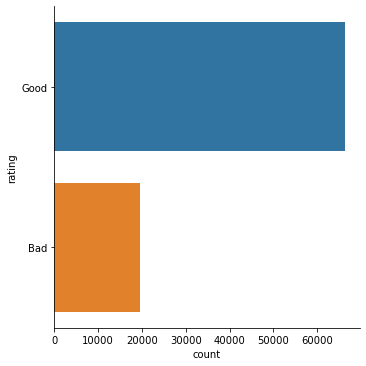

In [27]:
#review_score>3=goog, review_score<3=bad
sb.catplot(y = 'rating', data = orders, kind = "count")

#### Distribution of Product Category

Number of Product Category : 71
bed_bath_table                       10465
health_beauty                         7383
sports_leisure                        6447
furniture_decor                       6362
computers_accessories                 6276
                                     ...  
furniture_mattress_and_upholstery        6
la_cuisine                               5
fashion_childrens_clothes                4
computers                                1
security_and_services                    1
Name: product_category_name_english, Length: 71, dtype: int64


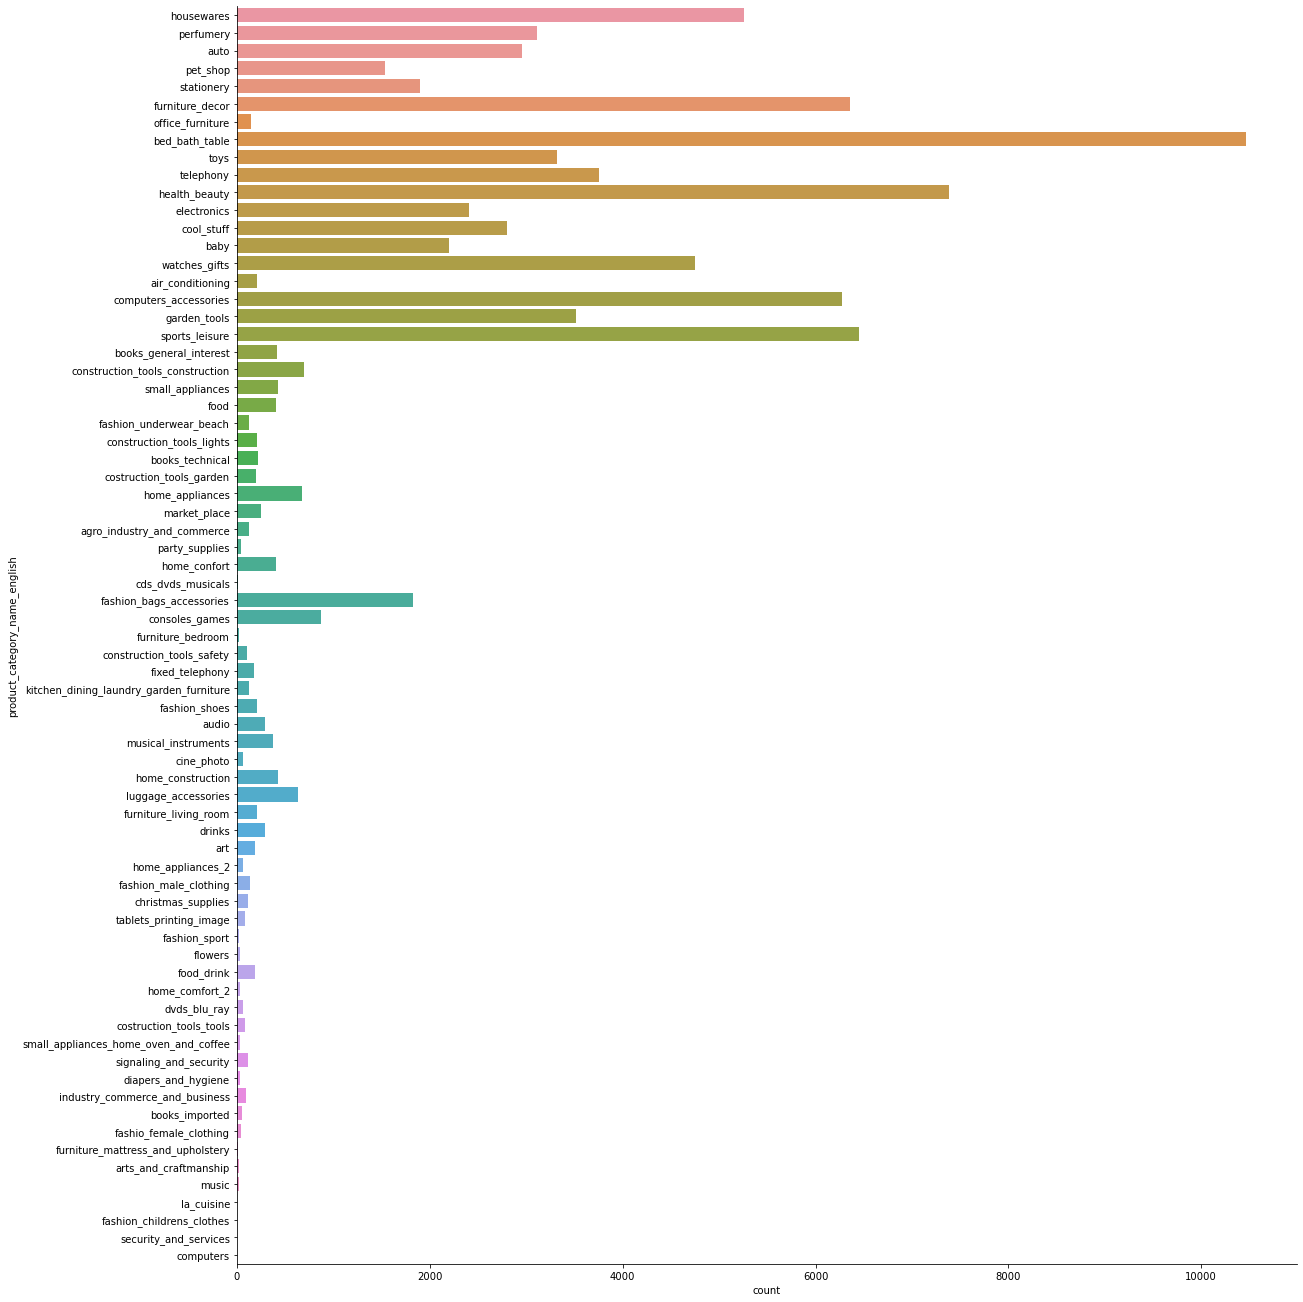

In [28]:
#Product Category in the Dataset
print("Number of Product Category :", len(orders['product_category_name_english'].unique()))

# Product Category
print(orders['product_category_name_english'].value_counts())
sb.catplot(y = 'product_category_name_english', data = orders, kind = "count", height = 18)

#### Distribution of On Time Delivery

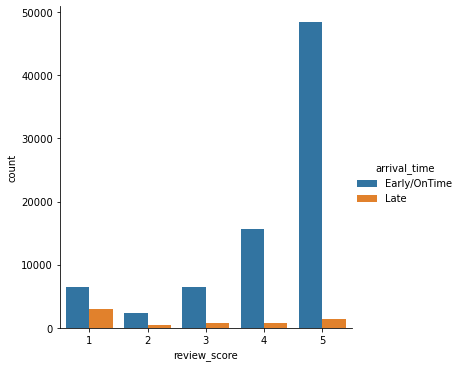

In [29]:
#  deliverday difference between actual and estimate
# this will be saved for later
ax = sb.catplot(
    x='review_score',
    kind='count',
    hue='arrival_time',
    data=orders
)
#orders that deliver on time/early has more 5 star reviews.

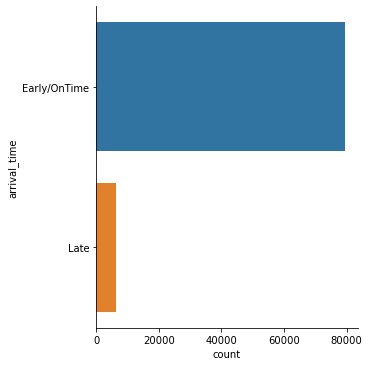

In [30]:
sb.catplot(y = 'arrival_time', data = orders, kind = "count")

#### Distribution of variables

<AxesSubplot:>

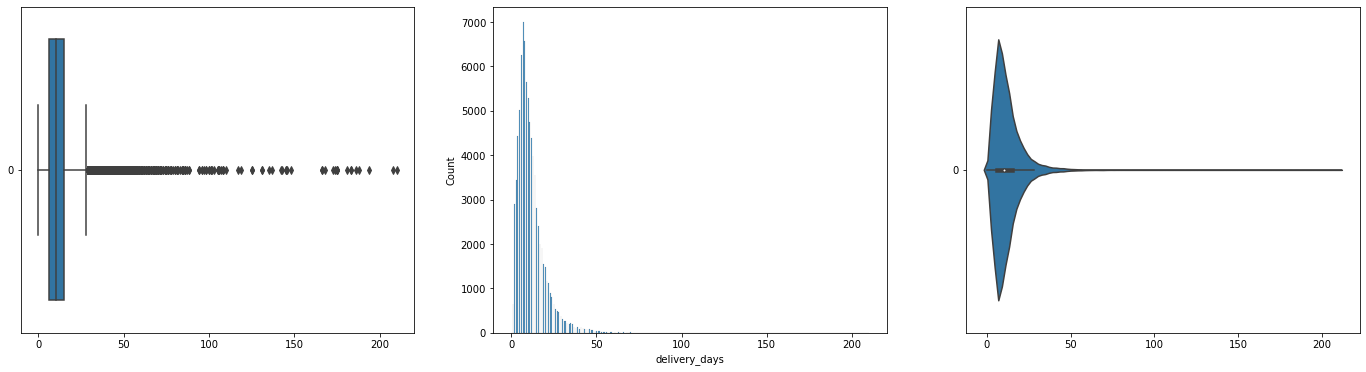

In [31]:
# Plot the distributions of Total Train	
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = orders['delivery_days'], orient = "h", ax = axes[0])
sb.histplot(data = orders['delivery_days'], ax = axes[1])
sb.violinplot(data = orders['delivery_days'], orient = "h", ax = axes[2])

<AxesSubplot:>

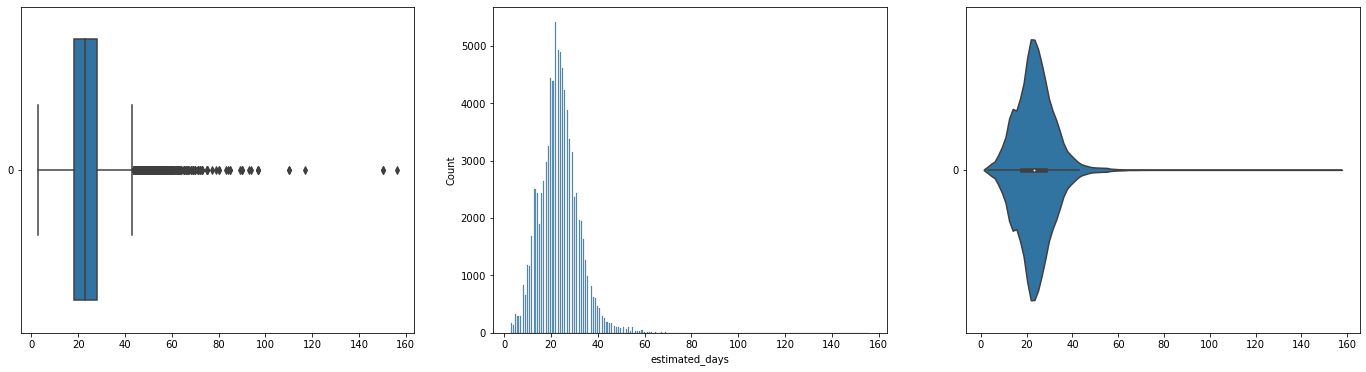

In [32]:
# Plot the distributions of Total Train	
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = orders['estimated_days'], orient = "h", ax = axes[0])
sb.histplot(data = orders['estimated_days'], ax = axes[1])
sb.violinplot(data = orders['estimated_days'], orient = "h", ax = axes[2])

<AxesSubplot:>

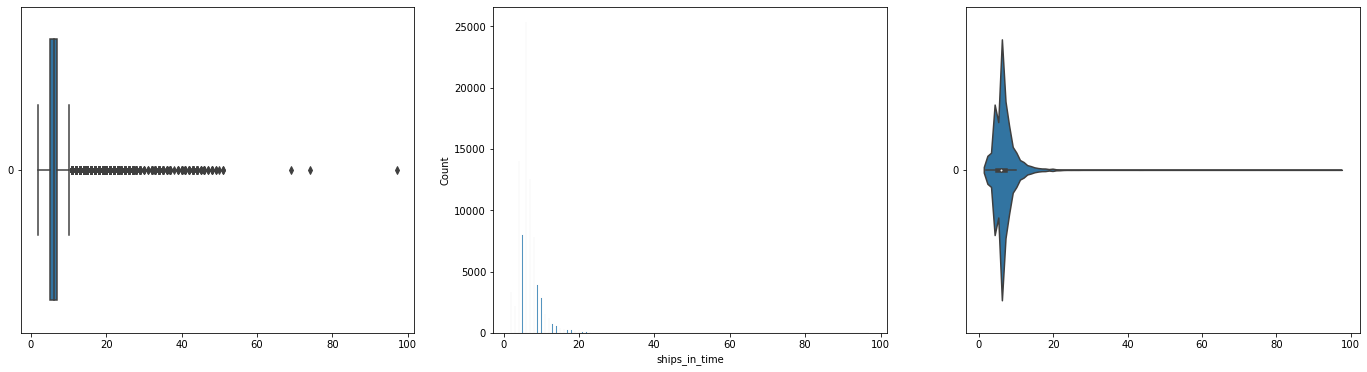

In [33]:
# Plot the distributions of Total Train	
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = orders['ships_in_time'], orient = "h", ax = axes[0])
sb.histplot(data = orders['ships_in_time'], ax = axes[1])
sb.violinplot(data = orders['ships_in_time'], orient = "h", ax = axes[2])

<AxesSubplot:>

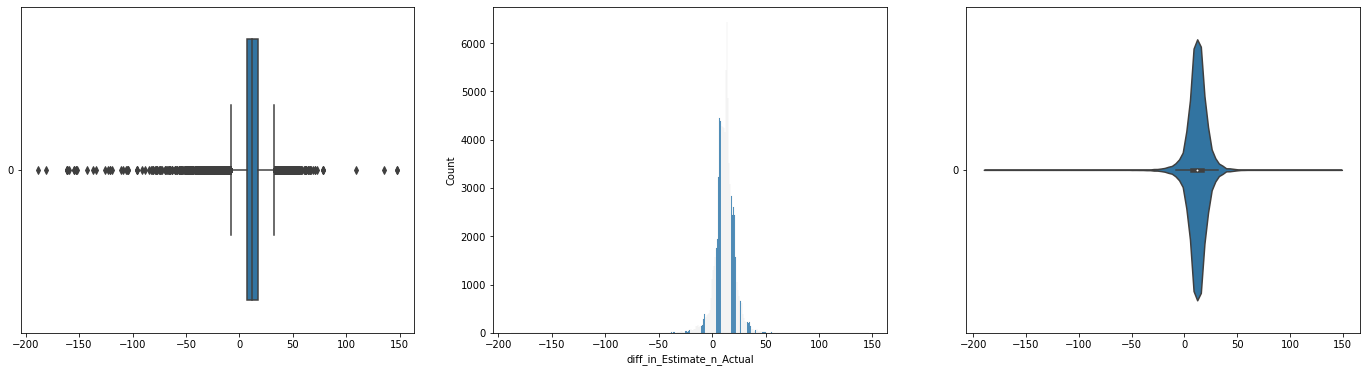

In [34]:
# Plot the distributions of Total Train	
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = orders['diff_in_Estimate_n_Actual'], orient = "h", ax = axes[0])
sb.histplot(data = orders['diff_in_Estimate_n_Actual'], ax = axes[1])
sb.violinplot(data = orders['diff_in_Estimate_n_Actual'], orient = "h", ax = axes[2])

<AxesSubplot:>

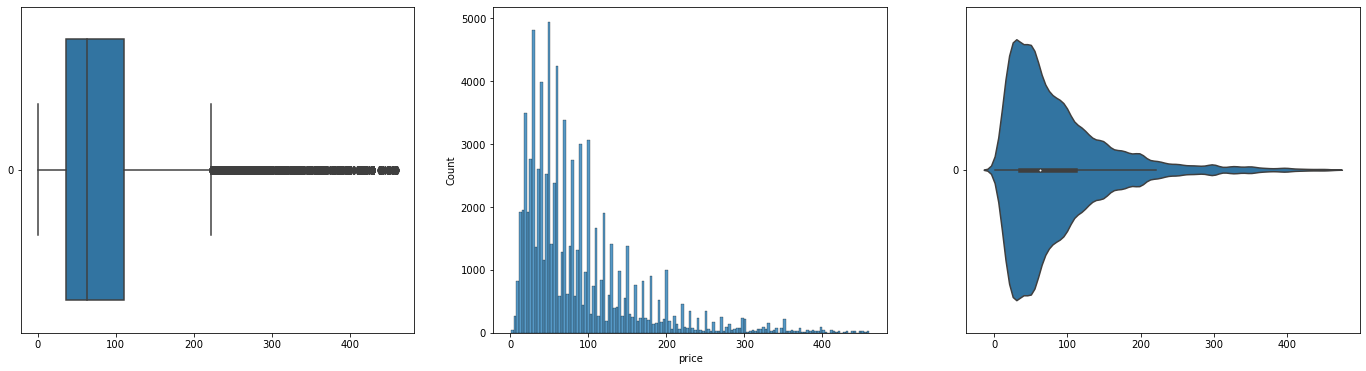

In [35]:
# Plot the distributions of Total Train	
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = orders['price'], orient = "h", ax = axes[0])
sb.histplot(data = orders['price'], ax = axes[1])
sb.violinplot(data = orders['price'], orient = "h", ax = axes[2])

<AxesSubplot:>

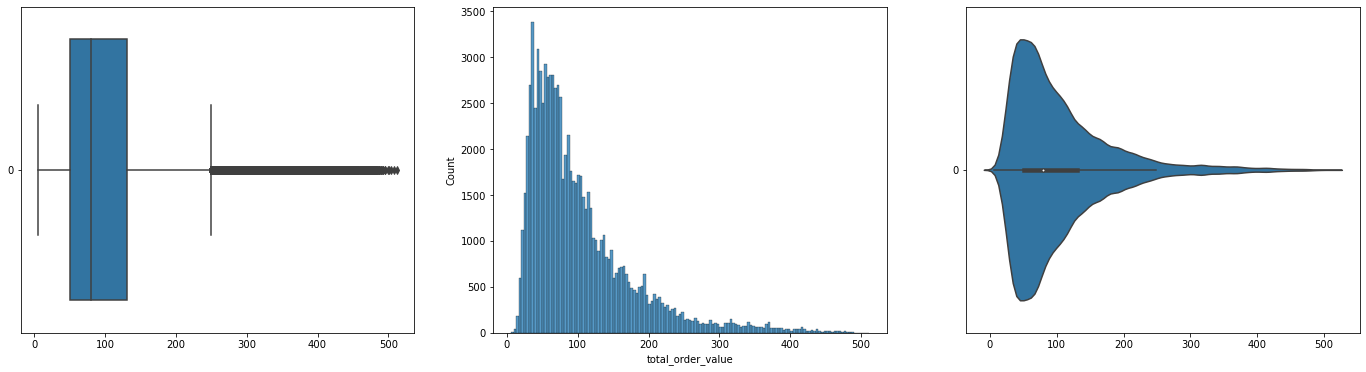

In [36]:
# Plot the distributions of Total Train	
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = orders['total_order_value'], orient = "h", ax = axes[0])
sb.histplot(data = orders['total_order_value'], ax = axes[1])
sb.violinplot(data = orders['total_order_value'], orient = "h", ax = axes[2])

<AxesSubplot:>

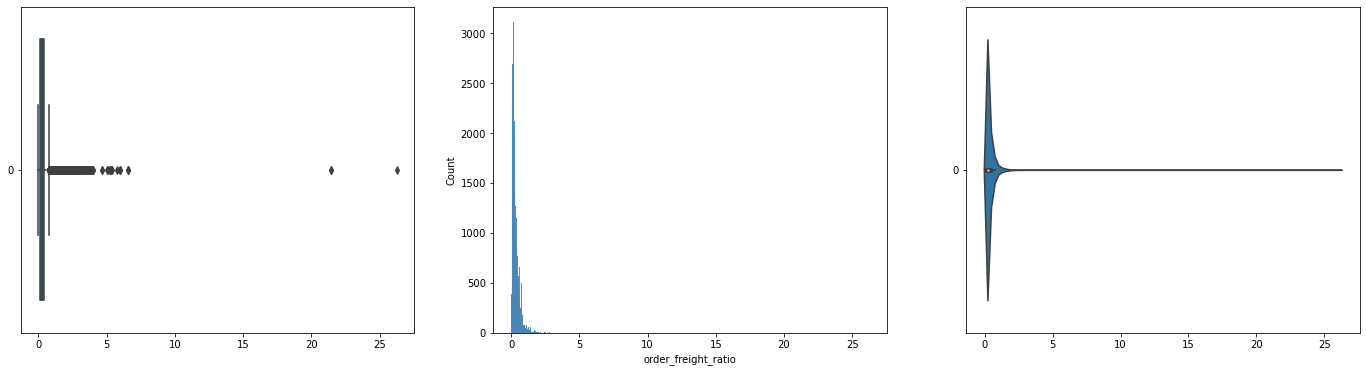

In [37]:
# Plot the distributions of Total Train	
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = orders['order_freight_ratio'], orient = "h", ax = axes[0])
sb.histplot(data = orders['order_freight_ratio'], ax = axes[1])
sb.violinplot(data = orders['order_freight_ratio'], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='delivery_days', ylabel='rating'>

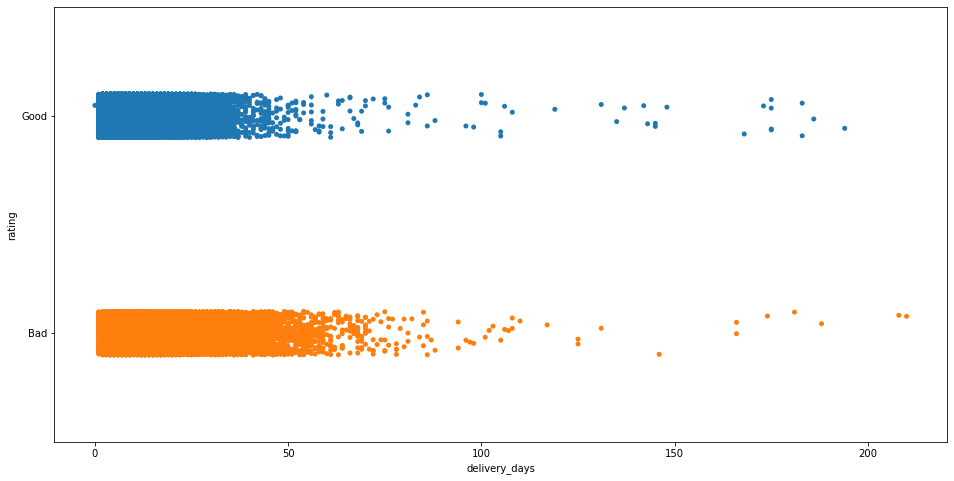

In [38]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'delivery_days', y = 'rating', data = orders)

<AxesSubplot:xlabel='estimated_days', ylabel='rating'>

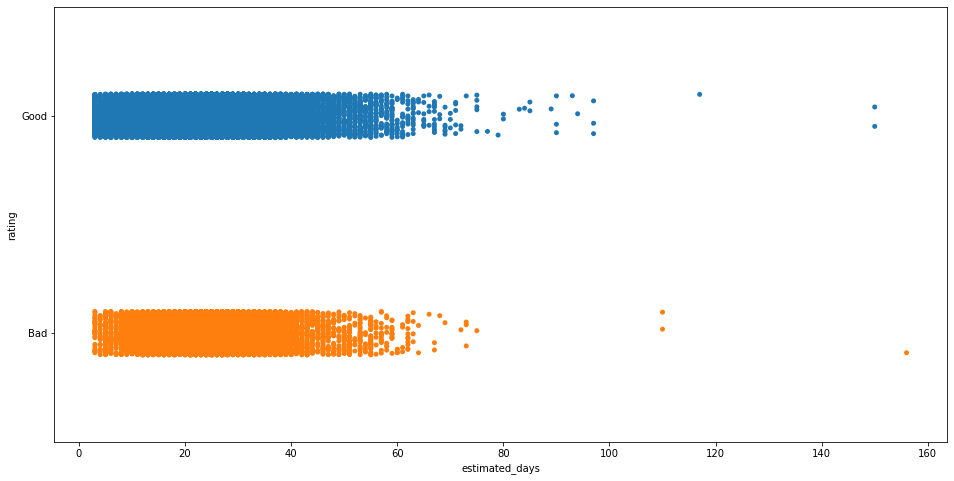

In [39]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'estimated_days', y = 'rating', data = orders)

<AxesSubplot:xlabel='ships_in_time', ylabel='rating'>

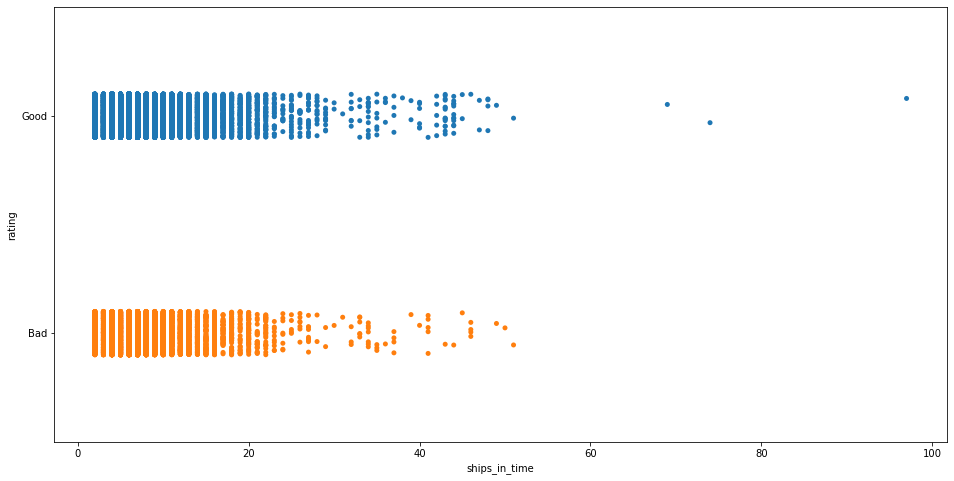

In [40]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'ships_in_time', y = 'rating', data = orders)

<AxesSubplot:xlabel='diff_in_Estimate_n_Actual', ylabel='rating'>

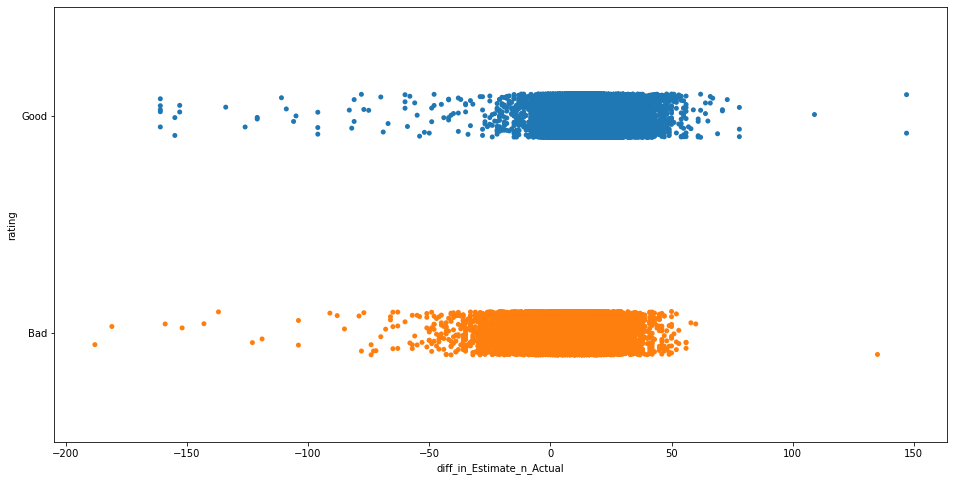

In [41]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'diff_in_Estimate_n_Actual', y = 'rating', data = orders)

<AxesSubplot:xlabel='price', ylabel='rating'>

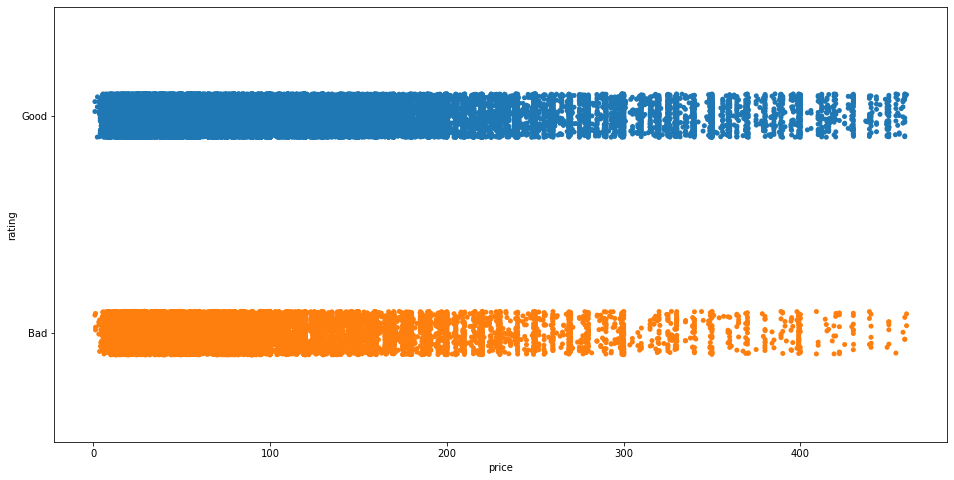

In [42]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'price', y = 'rating', data = orders)

<AxesSubplot:xlabel='total_order_value', ylabel='rating'>

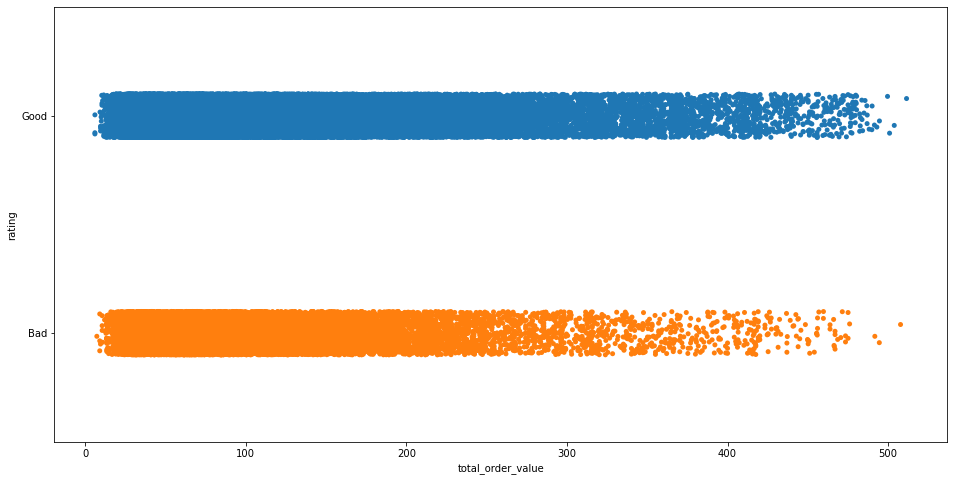

In [43]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'total_order_value', y = 'rating', data = orders)

<AxesSubplot:xlabel='order_freight_ratio', ylabel='rating'>

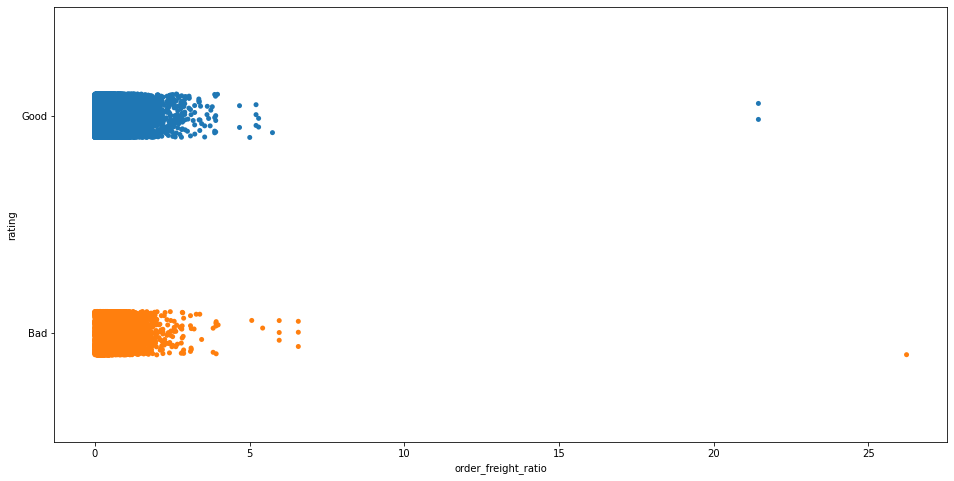

In [44]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'order_freight_ratio', y = 'rating', data = orders)

<AxesSubplot:xlabel='arrival_time', ylabel='rating'>

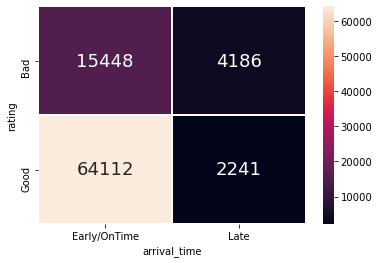

In [45]:
# Rating vs arrival time
f = plt.figure(figsize=(6, 4)) 
sb.heatmap(orders.groupby(['rating', 'arrival_time']).size().unstack(),
linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18})

<AxesSubplot:>

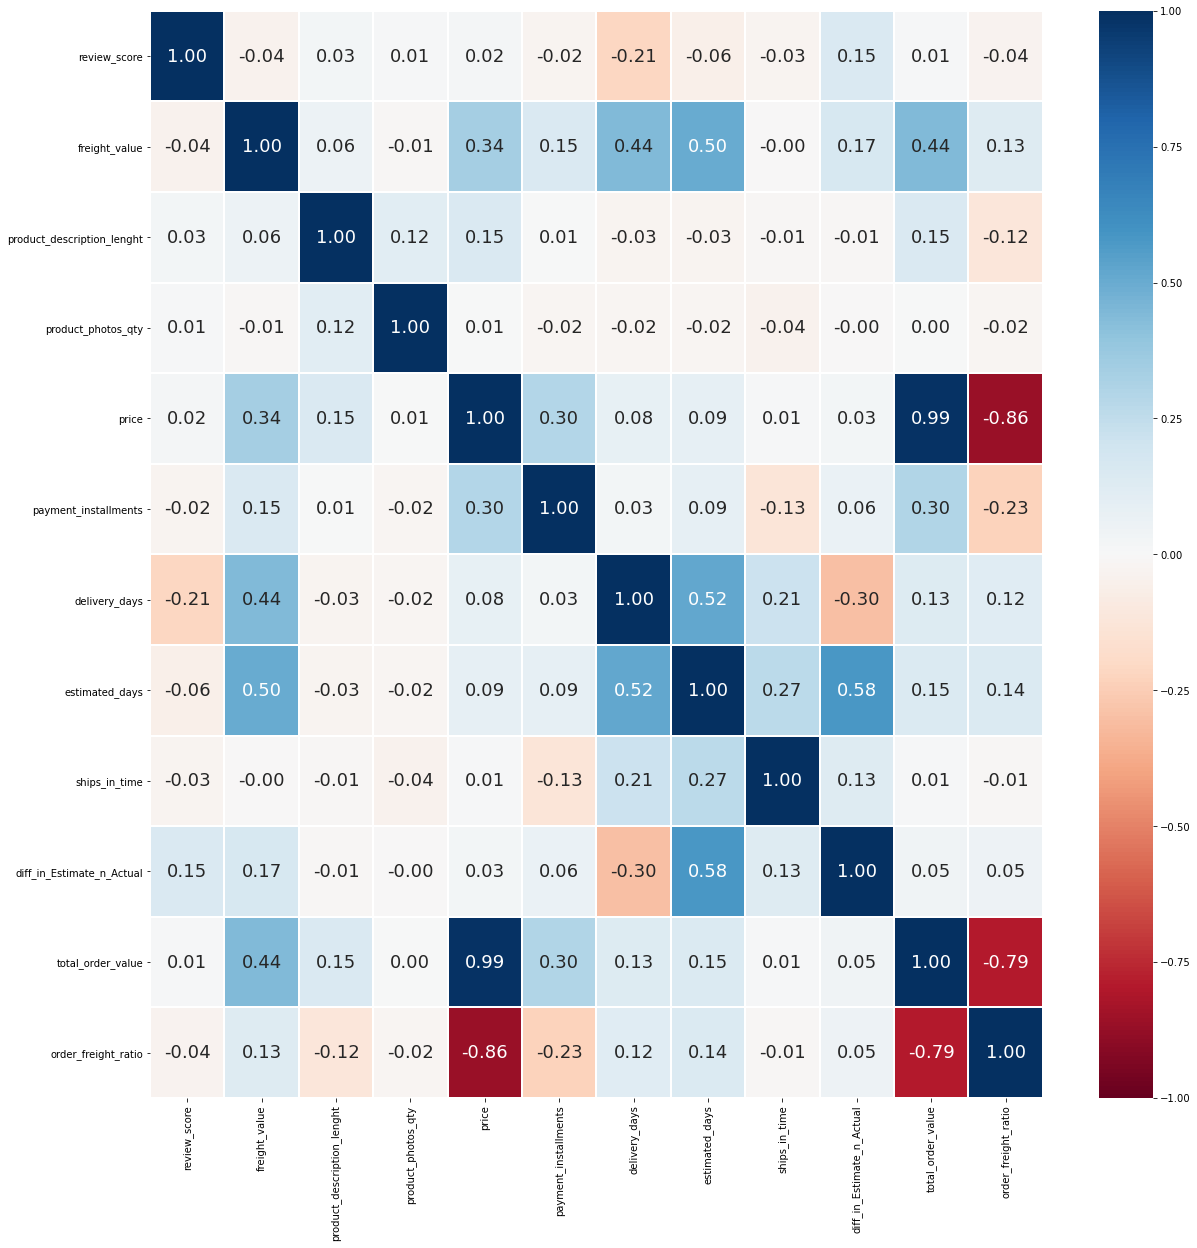

In [46]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(orders.corr(method = 'spearman'), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

---
## Creating Model for Rating Prediction

#### So as our rating is consider as class,there are several model we can try out on 
##### 1)Decision Tree Classifier
##### 2)Random Forest Classifier
##### 3)Naive Bayes

In [47]:
orders.head()

,order_id,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,shipping_limit_date,product_category_name_english,review_score,freight_value,...,price,payment_installments,delivery_days,estimated_days,ships_in_time,arrival_time,diff_in_Estimate_n_Actual,rating,total_order_value,order_freight_ratio
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-02,2017-10-18,2017-10-10,2017-10-04,2017-10-06,housewares,4,8.72,...,29.99,1,8,16,4,Early/OnTime,8,Good,38.71,0.290764
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-02,2017-10-18,2017-10-10,2017-10-04,2017-10-06,housewares,4,8.72,...,29.99,1,8,16,4,Early/OnTime,8,Good,38.71,0.290764
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-02,2017-10-18,2017-10-10,2017-10-04,2017-10-06,housewares,4,8.72,...,29.99,1,8,16,4,Early/OnTime,8,Good,38.71,0.290764
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-07-26,2018-08-13,2018-08-07,2018-07-26,2018-07-30,perfumery,4,22.76,...,118.70,1,14,20,6,Early/OnTime,6,Good,141.46,0.191744
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-08,2018-09-04,2018-08-17,2018-08-08,2018-08-13,auto,5,19.22,...,159.90,3,9,27,5,Early/OnTime,18,Good,179.12,0.120200


---
#### Used Variable:
##### 1)delivery_days
##### 2)estimated_days
##### 3)ships_in_time
##### 4)price
##### 5)order_freight_ratio

#### Predict:
##### Rating for the product
---

**We think that "diff_in_Estimate_n_Actual" and "total_order_value" is not very good as it does not distribute as much as used variable among the dataset**

In [97]:
temp = orders[['rating','delivery_days','estimated_days', 'ships_in_time', 'price', 'order_freight_ratio']]
print(temp.head())
temp['rating'] = temp['rating'].astype('category')
temp['rating'].cat.categories = [0,1]
temp['rating'] = temp['rating'].astype('float')

  rating  delivery_days  estimated_days  ships_in_time   price  \
0   Good              8              16              4   29.99   
1   Good              8              16              4   29.99   
2   Good              8              16              4   29.99   
3   Good             14              20              6  118.70   
4   Good              9              27              5  159.90   

   order_freight_ratio  
0             0.290764  
1             0.290764  
2             0.290764  
3             0.191744  
4             0.120200  


<ipython-input-97-ef8a9a8e81b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['rating'] = temp['rating'].astype('category')
<ipython-input-97-ef8a9a8e81b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['rating'] = temp['rating'].astype('float')


<AxesSubplot:>

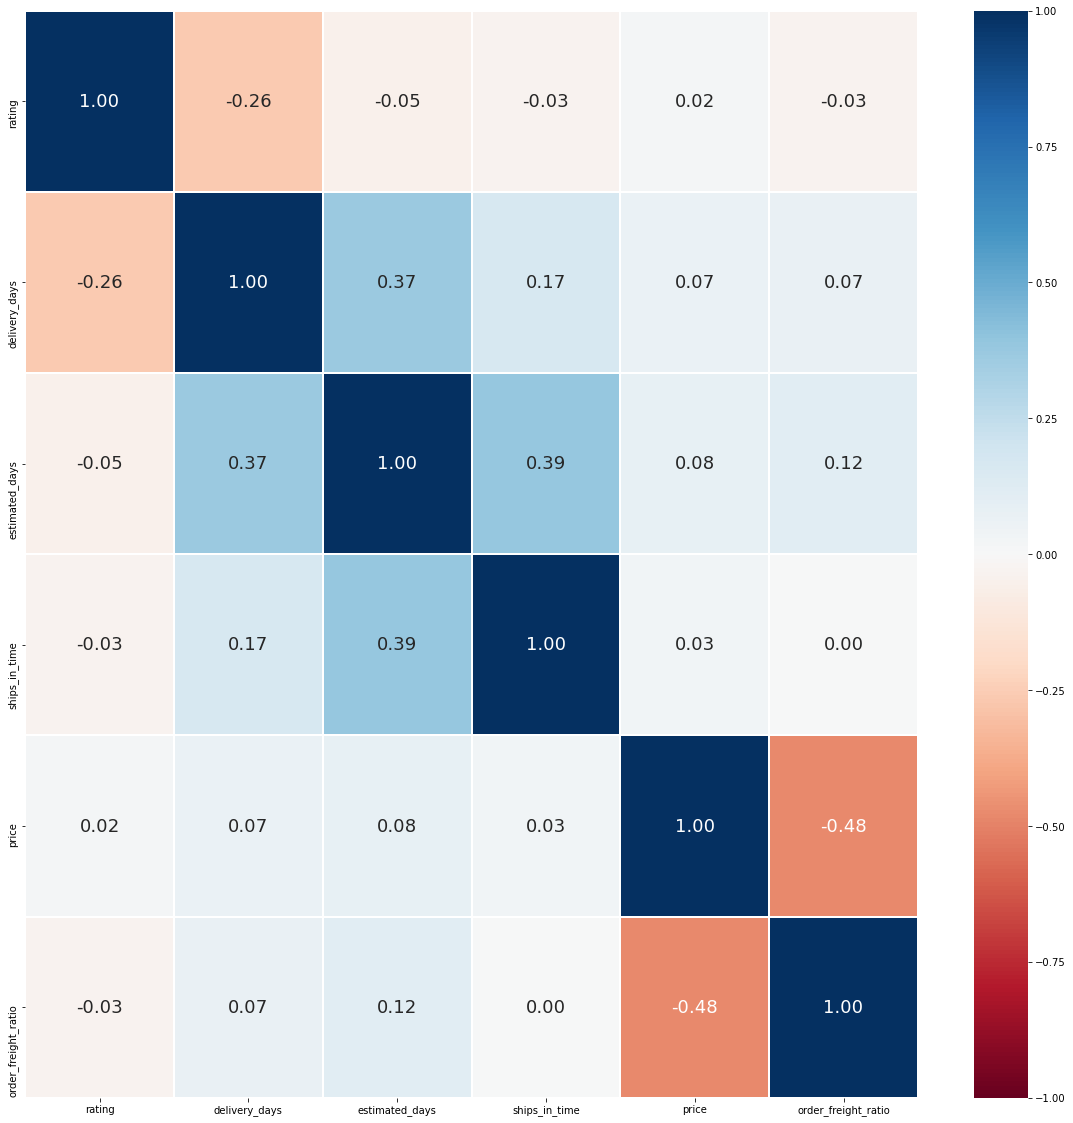

In [95]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(temp.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

---
### Method 1:Multi-Variate Decision Tree Classifier

#### Use the Best Model found through GridSearchCV

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Extract Response and Predictors
y =orders['rating']
X =orders[['delivery_days','estimated_days', 'ships_in_time', 'price', 'order_freight_ratio']]
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape,X_test.shape)
n_components =  list(range(1,X_train.shape[1]+1,1))

(60190, 5) (25797, 5)


In [49]:
pipe_grid = Pipeline(steps=[('slc', StandardScaler()), 
                            ('pca', PCA()),
                            ('dt', DecisionTreeClassifier(class_weight='balanced'))])
           
param_grid = {'pca__n_components' : n_components,
              'dt__criterion' : ['gini', 'entropy'],
              'dt__max_depth' : np.arange(2,10,2)}
              
# Create the Hyper-parameter Grid
hpGridDT = GridSearchCV(pipe_grid, param_grid)

# Train the models using Cross-Validation
hpGridDT.fit(X_train, y_train.ravel())

GridSearchCV(estimator=Pipeline(steps=[('slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dt',
                                        DecisionTreeClassifier(class_weight='balanced'))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': array([2, 4, 6, 8]),
                         'pca__n_components': [1, 2, 3, 4, 5]})

In [50]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGridDT.best_estimator_.get_params()['dt'])

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGridDT.best_score_))

DecisionTreeClassifier(class_weight='balanced', max_depth=2)
0.7807276956305035


#### Decision Tree

[Text(669.6, 1087.2, 'delivery_days <= 21.5\ngini = 0.5\nsamples = 60190\nvalue = [30095.0, 30095.0]\nclass = Good'),
 Text(334.8, 652.32, 'delivery_days <= 13.5\ngini = 0.494\nsamples = 54099\nvalue = [22794.566, 28320.848]\nclass = Good'),
 Text(167.4, 217.44000000000005, 'gini = 0.488\nsamples = 42294\nvalue = [16472.16, 22543.813]\nclass = Good'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.499\nsamples = 11805\nvalue = [6322.406, 5777.035]\nclass = Bad'),
 Text(1004.4000000000001, 652.32, 'delivery_days <= 27.5\ngini = 0.315\nsamples = 6091\nvalue = [7300.434, 1774.152]\nclass = Bad'),
 Text(837.0, 217.44000000000005, 'gini = 0.43\nsamples = 3112\nvalue = [2677.623, 1220.866]\nclass = Bad'),
 Text(1171.8, 217.44000000000005, 'gini = 0.191\nsamples = 2979\nvalue = [4622.811, 553.286]\nclass = Bad')]

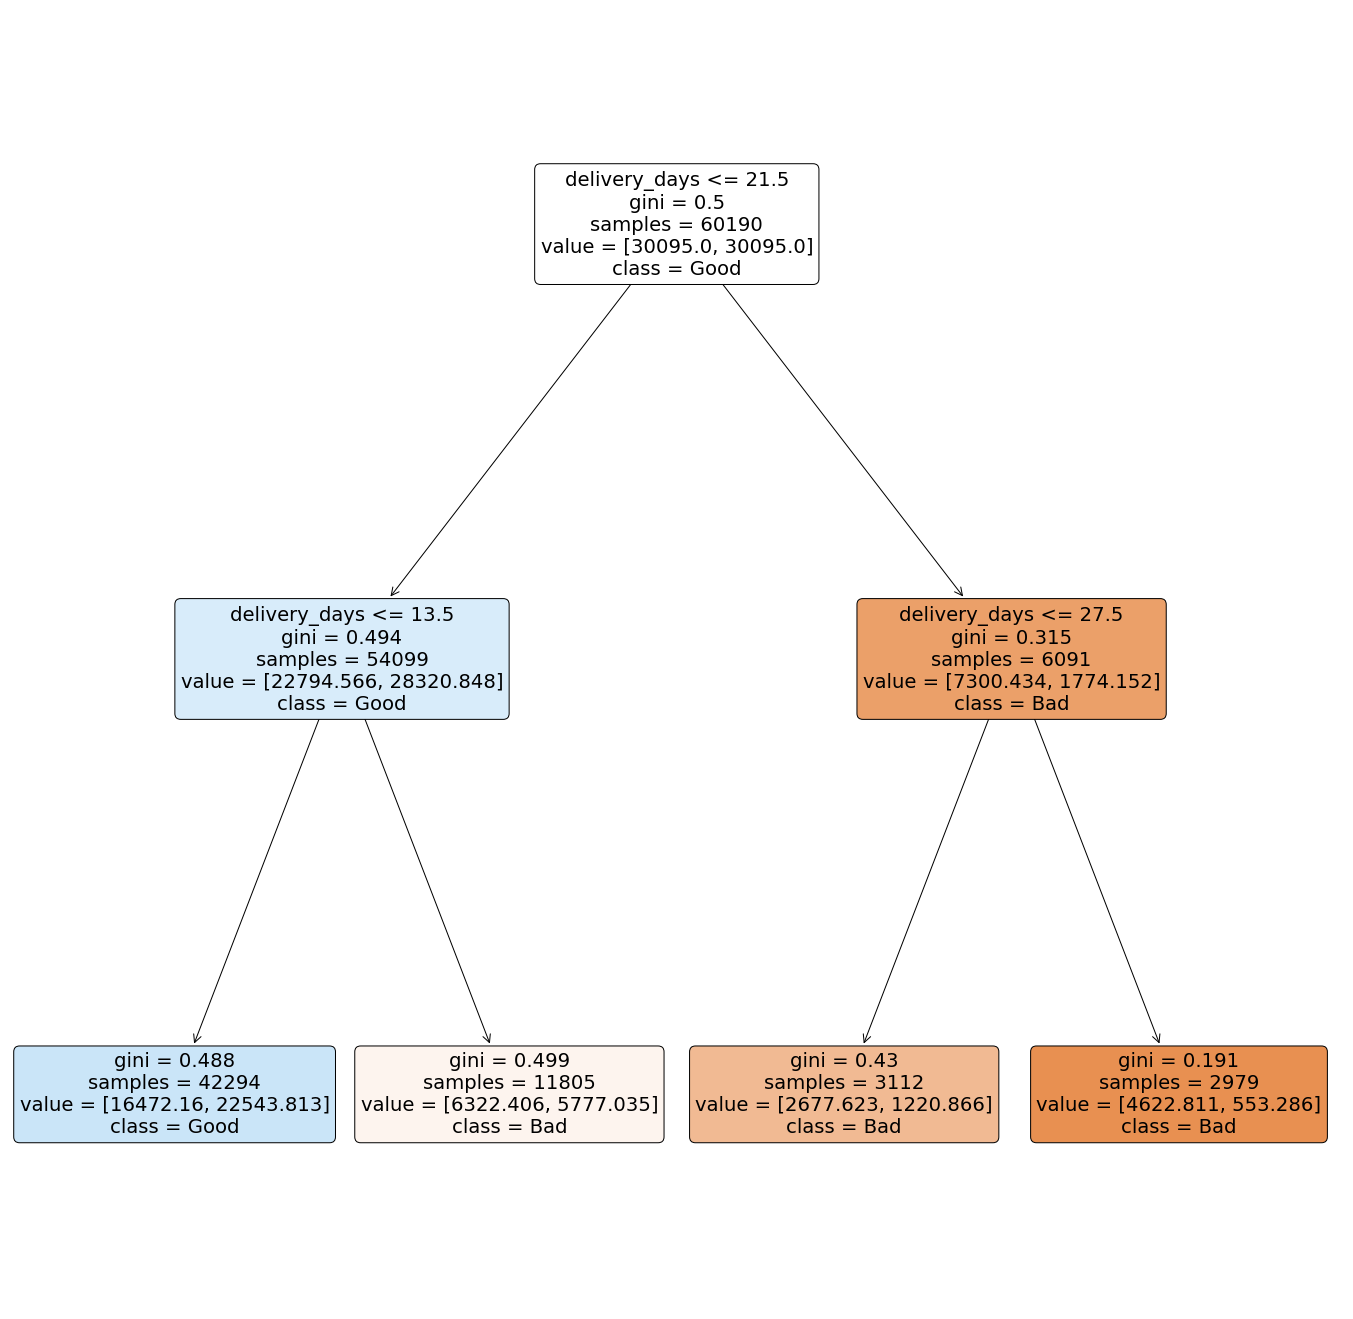

In [51]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Decision Tree using Train Data
dectree = hpGridDT.best_estimator_.get_params()['dt']  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Bad","Good"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Train Data
Accuracy  :	 0.6808938361854129

TPR Train :	 0.7490883197030835
TNR Train :	 0.45266122625839533

FPR Train :	 0.5473387737416047
FNR Train :	 0.25091168029691646


<AxesSubplot:>

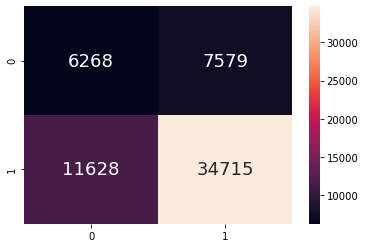

In [52]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

<AxesSubplot:>

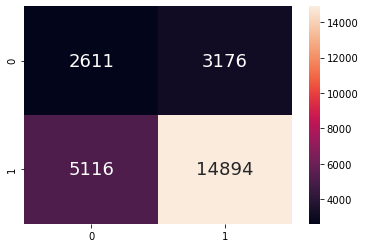

In [53]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [54]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.6785672752645656

TPR Test :	 0.7443278360819591
TNR Test :	 0.45118368757560046

FPR Test :	 0.5488163124243995
FNR Test :	 0.255672163918041


---
### Method 2: Random Forest Classifier(learn new stuff)

#### Advantages:
Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
The algorithm can be used in both classification and regression problems.
Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.
You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

#### Disadvantages:
Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.
The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.

#### Random Forests vs Decision Trees
Random forests is a set of multiple decision trees.
Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
Decision trees are computationally faster.
Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

In [55]:
orders

,order_id,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,shipping_limit_date,product_category_name_english,review_score,freight_value,...,price,payment_installments,delivery_days,estimated_days,ships_in_time,arrival_time,diff_in_Estimate_n_Actual,rating,total_order_value,order_freight_ratio
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-02,2017-10-18,2017-10-10,2017-10-04,2017-10-06,housewares,4,8.72,...,29.99,1,8,16,4,Early/OnTime,8,Good,38.71,0.290764
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-02,2017-10-18,2017-10-10,2017-10-04,2017-10-06,housewares,4,8.72,...,29.99,1,8,16,4,Early/OnTime,8,Good,38.71,0.290764
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-02,2017-10-18,2017-10-10,2017-10-04,2017-10-06,housewares,4,8.72,...,29.99,1,8,16,4,Early/OnTime,8,Good,38.71,0.290764
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-07-26,2018-08-13,2018-08-07,2018-07-26,2018-07-30,perfumery,4,22.76,...,118.70,1,14,20,6,Early/OnTime,6,Good,141.46,0.191744
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-08,2018-09-04,2018-08-17,2018-08-08,2018-08-13,auto,5,19.22,...,159.90,3,9,27,5,Early/OnTime,18,Good,179.12,0.120200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116575,9c5dedf39a927c1b2549525ed64a053c,2017-03-09,2017-03-09,2017-03-28,2017-03-17,2017-03-10,2017-03-15,health_beauty,5,13.08,...,72.00,3,8,19,6,Early/OnTime,11,Good,85.08,0.181667
116576,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-06,2018-03-02,2018-02-28,2018-02-07,2018-02-12,baby,4,20.10,...,174.90,3,22,24,6,Early/OnTime,2,Good,195.00,0.114923
116578,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-08,2018-02-15,2018-01-25,2018-01-12,2018-01-12,computers_accessories,2,40.59,...,179.99,4,17,38,4,Early/OnTime,21,Bad,220.58,0.225513
116579,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-08,2018-02-15,2018-01-25,2018-01-12,2018-01-12,computers_accessories,2,40.59,...,179.99,4,17,38,4,Early/OnTime,21,Bad,220.58,0.225513


In [56]:
orders.columns

Index(['order_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'order_delivered_carrier_date', 'shipping_limit_date',
       'product_category_name_english', 'review_score', 'freight_value',
       'product_description_lenght', 'product_photos_qty', 'price',
       'payment_installments', 'delivery_days', 'estimated_days',
       'ships_in_time', 'arrival_time', 'diff_in_Estimate_n_Actual', 'rating',
       'total_order_value', 'order_freight_ratio'],
      dtype='object')

In [57]:
df=pd.DataFrame()
df=orders[['order_id','product_category_name_english','arrival_time','delivery_days','estimated_days', 'ships_in_time', 'diff_in_Estimate_n_Actual', 'price','total_order_value','order_freight_ratio','rating']]

In [58]:
df

,order_id,product_category_name_english,arrival_time,delivery_days,estimated_days,ships_in_time,diff_in_Estimate_n_Actual,price,total_order_value,order_freight_ratio,rating
0,e481f51cbdc54678b7cc49136f2d6af7,housewares,Early/OnTime,8,16,4,8,29.99,38.71,0.290764,Good
1,e481f51cbdc54678b7cc49136f2d6af7,housewares,Early/OnTime,8,16,4,8,29.99,38.71,0.290764,Good
2,e481f51cbdc54678b7cc49136f2d6af7,housewares,Early/OnTime,8,16,4,8,29.99,38.71,0.290764,Good
3,53cdb2fc8bc7dce0b6741e2150273451,perfumery,Early/OnTime,14,20,6,6,118.70,141.46,0.191744,Good
4,47770eb9100c2d0c44946d9cf07ec65d,auto,Early/OnTime,9,27,5,18,159.90,179.12,0.120200,Good
...,...,...,...,...,...,...,...,...,...,...,...
116575,9c5dedf39a927c1b2549525ed64a053c,health_beauty,Early/OnTime,8,19,6,11,72.00,85.08,0.181667,Good
116576,63943bddc261676b46f01ca7ac2f7bd8,baby,Early/OnTime,22,24,6,2,174.90,195.00,0.114923,Good
116578,11c177c8e97725db2631073c19f07b62,computers_accessories,Early/OnTime,17,38,4,21,179.99,220.58,0.225513,Bad
116579,11c177c8e97725db2631073c19f07b62,computers_accessories,Early/OnTime,17,38,4,21,179.99,220.58,0.225513,Bad


#### Use the Best Model found through GridSearchCV

In [59]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

Pipeline(steps=[('slc', StandardScaler()), 
                            ('pca', PCA()),
                            ('rf', RandomForestClassifier(class_weight='balanced'))]).get_params()

{'memory': None,
 'steps': [('slc', StandardScaler()),
  ('pca', PCA()),
  ('rf', RandomForestClassifier(class_weight='balanced'))],
 'verbose': False,
 'slc': StandardScaler(),
 'pca': PCA(),
 'rf': RandomForestClassifier(class_weight='balanced'),
 'slc__copy': True,
 'slc__with_mean': True,
 'slc__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': 'balanced',
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_impurity_split': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm

In [60]:
# Define the Hyper-parameter Grid to search on, in case of Random Forest
pipe_grid = Pipeline(steps=[('slc', StandardScaler()), 
                            ('pca', PCA()),
                            ('rf', RandomForestClassifier(class_weight='balanced'))])
param_grid = {'pca__n_components' : n_components,
              'rf__criterion' : ['gini', 'entropy'],
              'rf__max_depth': np.arange(2, 11),                 # depth of trees 2, 3, 4, 5, ..., 10
              'rf__n_estimators': np.arange(100,1001,100)}       # number of trees 100, 200, ..., 1000

# Create the Hyper-parameter Grid
hpGridrf = RandomizedSearchCV(pipe_grid,   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'balanced_accuracy',n_jobs=-1)       # score to evaluate

# Train the models using Cross-Validation
hpGridrf.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('slc', StandardScaler()),
                                             ('pca', PCA()),
                                             ('rf',
                                              RandomForestClassifier(class_weight='balanced'))]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': [1, 2, 3, 4, 5],
                                        'rf__criterion': ['gini', 'entropy'],
                                        'rf__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'rf__n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   scoring='balanced_accuracy')

In [61]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGridrf.best_estimator_.get_params()['rf'])

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGridrf.best_score_))

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=900)
0.6150757542214356


In [62]:
# Random Forest using Train Data
rforest = hpGridrf.best_estimator_.get_params()['rf']  # create the object
rforest.fit(X_train, y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7806280112975578

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7493506996937629



<AxesSubplot:>

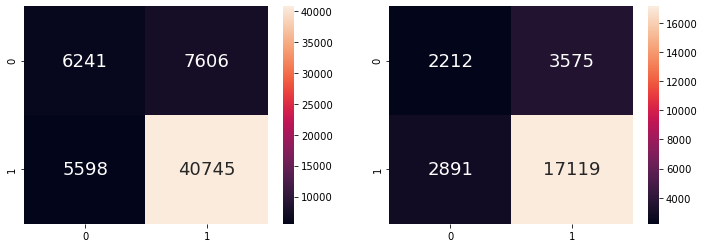

In [63]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [64]:
# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.8555222388805597
TNR Test :	 0.3822360463106964

FPR Test :	 0.6177639536893036
FNR Test :	 0.14447776111944027


---
### Method 3:Naive Bayes Classifier

#### Advantages:
It is easy and fast to predict class of test data set. It also perform well in multi class prediction
When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption)

#### Disadvantages:
If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

#### Application of Naive Bayes:

##### Real time Prediction: 
Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.

##### Multi class Prediction: 
This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.

##### Text classification/ Spam Filtering/ Sentiment Analysis: 
Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)

##### Recommendation System: 
Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7788336933045357

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7835407217893553



<AxesSubplot:>

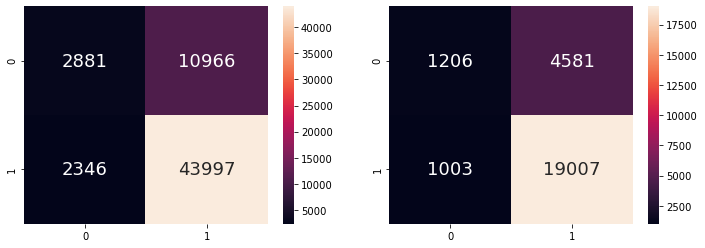

In [65]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gnb.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [66]:
# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.9498750624687656
TNR Test :	 0.208398133748056

FPR Test :	 0.7916018662519441
FNR Test :	 0.050124937531234384


---
## Testing on model with user input
### Enter your value to predict the ratings given by customer

In [72]:
'delivery_days','estimated_days', 'ships_in_time', 'price','order_freight_ratio'

('delivery_days',
 'estimated_days',
 'ships_in_time',
 'price',
 'order_freight_ratio')

In [73]:
dev = input("Please enter the actual delivery days of the product:")
est = input("Please enter the estimated delivery days of the product:")
ship = input("Please enter the ship in timing(days) of the product:")
pr = input("Please enter the price of the product:")
tt = input("Please enter the order_freight_ratio:")

Please enter the actual delivery days of the product:10
Please enter the estimated delivery days of the product:14
Please enter the ship in timing(days) of the product:5
Please enter the price of the product:20
Please enter the order_freight_ratio:0.3


In [76]:
dectree.predict([[dev,est,ship,pr,tt]])

array(['Good'], dtype=object)

In [77]:
rforest.predict([[dev,est,ship,pr,tt]])

array(['Bad'], dtype=object)

In [82]:
gnb.predict(np.array([[dev,est,ship,pr,tt]], dtype=np.float32))

array(['Good'], dtype='<U4')